In [1]:
# Packages laden
import numpy as np
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Input, Dense
from matplotlib import pyplot as plt
from pandas import DataFrame
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Dropout, Activation, Flatten,TimeDistributed, BatchNormalization, LeakyReLU, Activation 
from keras.models import Model
from pandas import concat
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Laden der Daten
DATA_FILE="Dropbox/Masterarbeit/Masterarbeit/Datensätze/Geburtenrate/Datensatz.xlsx"
df = pd.read_excel(DATA_FILE)
df=pd.read_excel(DATA_FILE, header=0, parse_dates=[0], index_col='Jahr-Monat',squeeze=True)

In [3]:
# Ein array mit allen Einträgen --> zur besseren Weiterverarbeitung
ZR=df.values

In [4]:
# Anteil der Datensätze am Gesamtdatensatz
ZR_100=ZR
ZR_46=ZR[-400:]

# Unterteilung der Teildatensätze in Trainings-und Testdaten
ZR_100_TR, ZR_100_TE= ZR_100[0:605], ZR_100[605:len(ZR_100)]
ZR_46_TR, ZR_46_TE= ZR_46[0:250], ZR_46[250:len(ZR_46)]

In [5]:
# Funktion: Datensatz erstellen mit Inputs (look_back: Anzahl der verwendten Vergangenheitswerte) + Output (look_forward: 
# Vorhersagehorizont)
def timeseries_to_supervised_R(data, look_back, look_forward):
    df = DataFrame(data)
    columns = [df.shift(look_forward-1+i) for i in range(1, look_back+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    #df = df.drop(0)
    DF=df[::-1]
    df=DF[:len(df)-(look_back+look_forward-1)]
    DF=df[::-1]
    return DF

In [6]:
# Festlegung: look_back, look_forward + Anwendung der Funktion
# Inputneuronen: 12
# Vorhersagehorizont: t+60
look_back=12
look_forward=60

# Inputgröße 100%
# Trainingsdaten
ZR_100_TR_I=timeseries_to_supervised_R(ZR_100_TR, look_back, look_forward)
trainX_100, train_y_100 = ZR_100_TR_I.iloc[:, 0:-1], ZR_100_TR_I.iloc[:, -1]

# Testdaten 
ZR_100_TE_I=timeseries_to_supervised_R(ZR_100_TE, look_back, look_forward)
testX_100, test_y_100 = ZR_100_TE_I.iloc[:, 0:-1], ZR_100_TE_I.iloc[:, -1]


# Inputgröße 46%
# Trainingsdaten
ZR_46_TR_I=timeseries_to_supervised_R(ZR_46_TR, look_back, look_forward)
trainX_46, train_y_46 = ZR_46_TR_I.iloc[:, 0:-1], ZR_46_TR_I.iloc[:, -1]

# Testdaten 
ZR_46_TE_I=timeseries_to_supervised_R(ZR_46_TE, look_back, look_forward)
testX_46, test_y_46 = ZR_46_TE_I.iloc[:, 0:-1], ZR_46_TE_I.iloc[:, -1]

In [23]:
# Replizierbarkeit gewährleisten
np.random.seed(1)

In [24]:
# Modell zusammenbauen
# Dateninput: 100 %
model = Sequential()
model.add(Dense(6, input_dim=look_back, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history_reg=model.fit(trainX_100, train_y_100, epochs=200,batch_size=25, verbose=2,validation_data=(testX_100, test_y_100))

Train on 534 samples, validate on 187 samples
Epoch 1/200
 - 1s - loss: 5318800335.9401 - val_loss: 346739358.7166
Epoch 2/200
 - 0s - loss: 369452329.4682 - val_loss: 68321745.7968
Epoch 3/200
 - 0s - loss: 269774140.5993 - val_loss: 67483350.5455
Epoch 4/200
 - 0s - loss: 252106185.7678 - val_loss: 58030714.6952
Epoch 5/200
 - 0s - loss: 219007368.5993 - val_loss: 55264082.1604
Epoch 6/200
 - 0s - loss: 213562944.6442 - val_loss: 53697936.5775
Epoch 7/200
 - 0s - loss: 208470864.3446 - val_loss: 51583387.2193
Epoch 8/200
 - 0s - loss: 207088068.5843 - val_loss: 50356054.4813
Epoch 9/200
 - 0s - loss: 207433544.2846 - val_loss: 52150442.0535
Epoch 10/200
 - 0s - loss: 203684671.4157 - val_loss: 51103376.7487
Epoch 11/200
 - 0s - loss: 202284008.5094 - val_loss: 51585718.1711
Epoch 12/200
 - 0s - loss: 201579377.7228 - val_loss: 49115469.4011
Epoch 13/200
 - 0s - loss: 201848625.4682 - val_loss: 50320176.9626
Epoch 14/200
 - 0s - loss: 199007075.6554 - val_loss: 49307076.1818
Epoch 15/

Epoch 121/200
 - 0s - loss: 160362373.3933 - val_loss: 41325941.0588
Epoch 122/200
 - 0s - loss: 162154124.8539 - val_loss: 45072037.6096
Epoch 123/200
 - 0s - loss: 161092877.5880 - val_loss: 46277775.8930
Epoch 124/200
 - 0s - loss: 162159145.4382 - val_loss: 38965829.3369
Epoch 125/200
 - 0s - loss: 164087589.1685 - val_loss: 48393006.4759
Epoch 126/200
 - 0s - loss: 161216569.0637 - val_loss: 48714460.4011
Epoch 127/200
 - 0s - loss: 161907655.3558 - val_loss: 39879199.1872
Epoch 128/200
 - 0s - loss: 159262772.0300 - val_loss: 42846262.0909
Epoch 129/200
 - 0s - loss: 157582773.2285 - val_loss: 38470331.1711
Epoch 130/200
 - 0s - loss: 169553218.3221 - val_loss: 38042469.0267
Epoch 131/200
 - 0s - loss: 158690571.1610 - val_loss: 58125567.2941
Epoch 132/200
 - 0s - loss: 162824779.0562 - val_loss: 42390521.5455
Epoch 133/200
 - 0s - loss: 158211024.0749 - val_loss: 40823980.0856
Epoch 134/200
 - 0s - loss: 161347501.2285 - val_loss: 40716485.4011
Epoch 135/200
 - 0s - loss: 165371

Text(0.5,1,'Loss Curves')

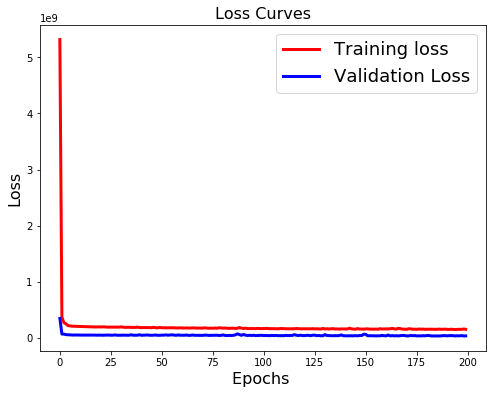

In [25]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [26]:
# Modellperformance bewerten: normalisierte Daten
trainScore = model.evaluate(trainX_100, train_y_100, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX_100, test_y_100, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 149489830.80 MSE (12226.60 RMSE)
Test Score: 36543114.78 MSE (6045.09 RMSE)


In [27]:
# Vorhersagen generieren
trainPredict_100 = model.predict(trainX_100)
testPredict_100 = model.predict(testX_100)

In [28]:
# Evaluation
test_MSE=mean_squared_error(test_y_100,testPredict_100)
train_MSE=mean_squared_error(train_y_100,trainPredict_100)

print(test_MSE,train_MSE)

36543114.236098506 149489834.90815267


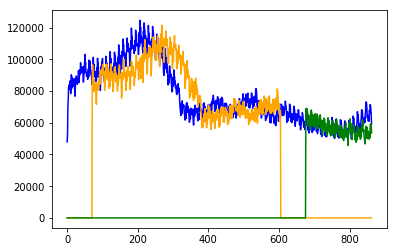

In [29]:
# Verschiebund der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_100)
trainPredictPlot=trainPredictPlot.reshape(len(ZR_100))
trainPredictPlot[:]=[0]*len(ZR_100)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_100),1)
trainPredictPlot[(look_back+look_forward-1):len(trainPredict_100)+(look_back+look_forward-1)] = trainPredict_100

# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_100)
testPredictPlot=testPredictPlot.reshape(len(ZR_100))
testPredictPlot[:]=[0]*len(ZR_100)
testPredictPlot = testPredictPlot.reshape(len(ZR_100),1)
testPredictPlot[len(trainPredict_100)+2*(look_back+look_forward-1):len(ZR_100)+1] = testPredict_100
 
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_100, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()

In [48]:
# Replizierbarkeit gewährleisten
np.random.seed(0)

In [49]:
# Modell zusammenbauen
# Dateninput: 46 %
model = Sequential()
model.add(Dense(6, input_dim=look_back, activation='relu'))
model.add(Dense(4 , activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history_reg=model.fit(trainX_46, train_y_46, epochs=200, batch_size=25, verbose=2,validation_data=(testX_46, test_y_46))

Train on 179 samples, validate on 79 samples
Epoch 1/200
 - 1s - loss: 1175590943.1061 - val_loss: 236544532.2532
Epoch 2/200
 - 0s - loss: 545411439.0168 - val_loss: 102292275.8228
Epoch 3/200
 - 0s - loss: 295233692.9609 - val_loss: 44957096.3291
Epoch 4/200
 - 0s - loss: 150928276.9609 - val_loss: 30433885.4430
Epoch 5/200
 - 0s - loss: 73183939.3743 - val_loss: 38657960.6835
Epoch 6/200
 - 0s - loss: 42372154.5028 - val_loss: 53064114.3038
Epoch 7/200
 - 0s - loss: 31692781.2291 - val_loss: 64798230.2911
Epoch 8/200
 - 0s - loss: 29896897.4190 - val_loss: 72522883.8101
Epoch 9/200
 - 0s - loss: 30219920.0279 - val_loss: 76176284.5823
Epoch 10/200
 - 0s - loss: 30275212.5922 - val_loss: 75818875.0380
Epoch 11/200
 - 0s - loss: 30230673.0838 - val_loss: 73383708.0253
Epoch 12/200
 - 0s - loss: 30044055.0615 - val_loss: 71961258.0633
Epoch 13/200
 - 0s - loss: 29975450.1899 - val_loss: 71063338.3291
Epoch 14/200
 - 0s - loss: 29983264.2570 - val_loss: 70135254.7468
Epoch 15/200
 - 0s 

Epoch 123/200
 - 0s - loss: 28826429.8659 - val_loss: 69938617.3924
Epoch 124/200
 - 0s - loss: 28593106.7374 - val_loss: 69744682.1013
Epoch 125/200
 - 0s - loss: 28997941.1955 - val_loss: 66901251.1139
Epoch 126/200
 - 0s - loss: 28573989.5754 - val_loss: 70298784.7342
Epoch 127/200
 - 0s - loss: 28952820.7039 - val_loss: 72788185.4051
Epoch 128/200
 - 0s - loss: 28767281.8715 - val_loss: 69959976.3418
Epoch 129/200
 - 0s - loss: 28431721.9106 - val_loss: 66136154.8987
Epoch 130/200
 - 0s - loss: 28632744.1061 - val_loss: 69159197.0253
Epoch 131/200
 - 0s - loss: 28460101.9218 - val_loss: 69738197.9114
Epoch 132/200
 - 0s - loss: 28600003.8156 - val_loss: 71047290.8608
Epoch 133/200
 - 0s - loss: 28540602.6201 - val_loss: 70554810.3544
Epoch 134/200
 - 0s - loss: 28438760.3073 - val_loss: 67574507.0127
Epoch 135/200
 - 0s - loss: 28446729.1341 - val_loss: 70149702.7595
Epoch 136/200
 - 0s - loss: 28434777.4302 - val_loss: 68931530.9620
Epoch 137/200
 - 0s - loss: 28480600.4302 - val_

Text(0.5,1,'Loss Curves')

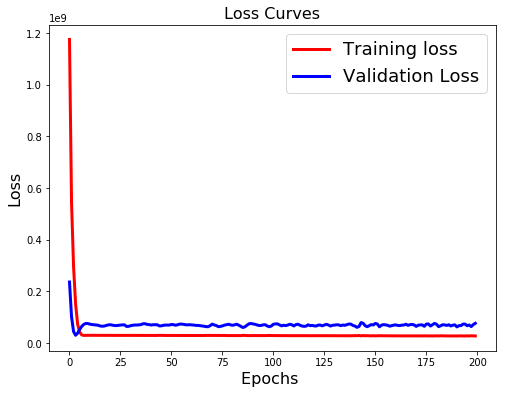

In [50]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [51]:
# Modellperformance bewerten
trainScore = model.evaluate(trainX_46, train_y_46, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX_46, test_y_46, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 27807631.25 MSE (5273.29 RMSE)
Test Score: 76714576.20 MSE (8758.69 RMSE)


In [52]:
# Vorhersagen generieren
trainPredict_46 = model.predict(trainX_46)
testPredict_46 = model.predict(testX_46)

In [53]:
# Evaluation
test_MSE=mean_squared_error(test_y_46,testPredict_46)
train_MSE=mean_squared_error(train_y_46,trainPredict_46)

print(test_MSE,train_MSE)

76714574.79041493 27807630.70703432


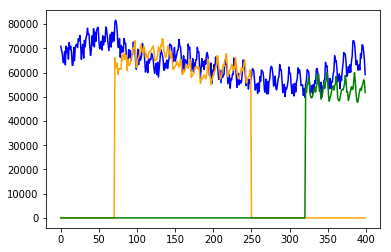

In [54]:
# Verschiebund der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_46)
trainPredictPlot=trainPredictPlot.reshape(len(ZR_46))
trainPredictPlot[:]=[0]*len(ZR_46)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_46),1)
trainPredictPlot[(look_back+look_forward-1):len(trainPredict_46)+(look_back+look_forward-1)] = trainPredict_46

# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_46)
testPredictPlot=testPredictPlot.reshape(len(ZR_46))
testPredictPlot[:]=[0]*len(ZR_46)
testPredictPlot = testPredictPlot.reshape(len(ZR_46),1)
testPredictPlot[len(trainPredict_46)+2*(look_back+look_forward-1):len(ZR_46)+1] = testPredict_46
 
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_46, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()